# Machine Learning in Healthcare: Predicting Diabetes Mellitus

## 1- Problem statement

Diabetes Mellitus is a widespread chronic disease affecting millions worldwide, with its prevalence steadily increasing. Early detection and intervention are crucial to managing the disease and reducing its complications. This project aims to develop a predictive model using machine learning algorithms to identify individuals at risk of developing diabetes mellitus based on various health parameters. By analyzing a dataset containing information such as glucose levels, blood pressure, BMI, and family history, the goal is to create a reliable model that can assist healthcare professionals in early diagnosis and personalized intervention strategies. This model will not only aid in identifying high-risk individuals but also contribute to the prevention and management of diabetes mellitus on a larger scale.

## 2- Objective

Develop a machine learning model to predict diabetes mellitus onset using features such as glucose levels, blood pressure, BMI, etc. Optimize models for accuracy, interpretability, and early detection to assist healthcare providers in personalized intervention strategies and improve patient outcomes.

## 3- Data Preprocessing

### Import Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### Import Dataset

In [58]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [59]:
# Display the first 5 rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
# Display a summary of the DataFrame, including information about data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
# Check the count of missing values for each column in the DataFrame
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
# Check if there are any duplicated rows in the DataFrame
df.duplicated().any()

False

In [63]:
# Generate descriptive statistics for the DataFrame and round the values to the nearest whole number
df.describe().round() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [64]:
# Count the number of occurrences of each value in the 'Outcome' column of the DataFrame
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

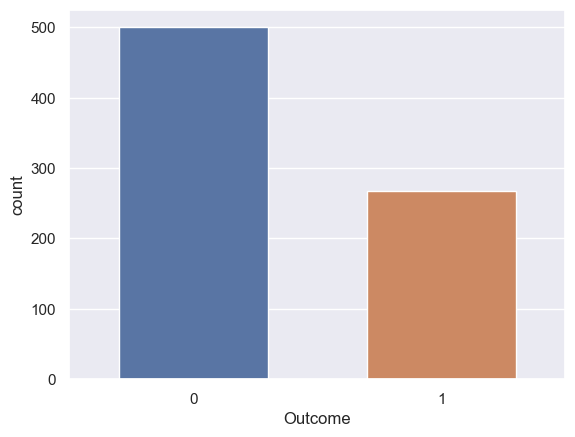

In [65]:
import seaborn as sns
sns.set()

ax = sns.countplot(x="Outcome", width=0.6, data=df)

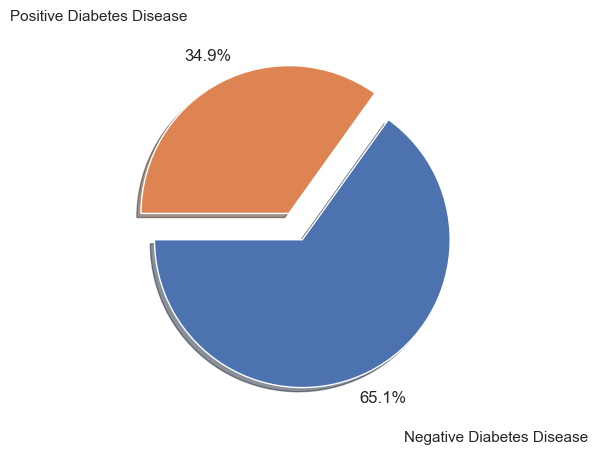

In [66]:
plt.pie(df.Outcome.value_counts(),labels=('Negative Diabetes Disease','Positive Diabetes Disease'),
        explode = [0.1,0.1],autopct ='%1.1f%%',shadow = True, startangle = 180, labeldistance = 1.5, pctdistance =1.2)
plt.show()

In [67]:
df.Insulin.value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

### check outlier data in the dataset

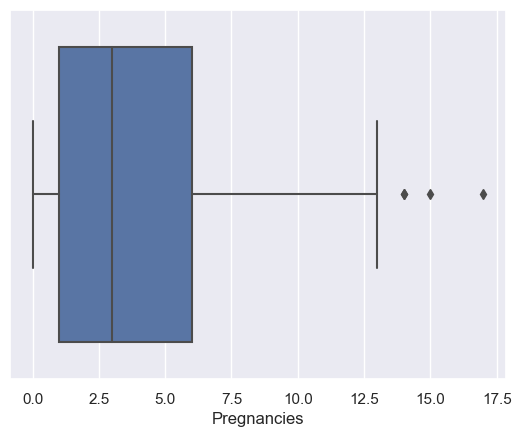

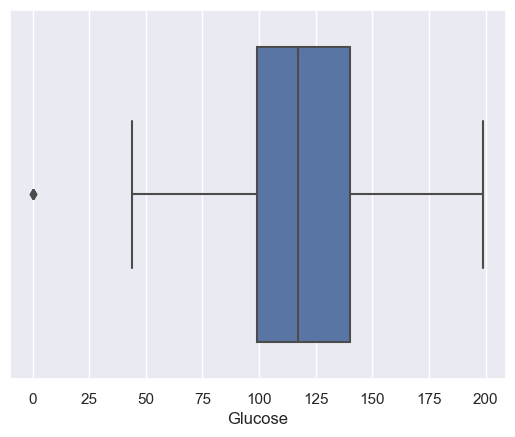

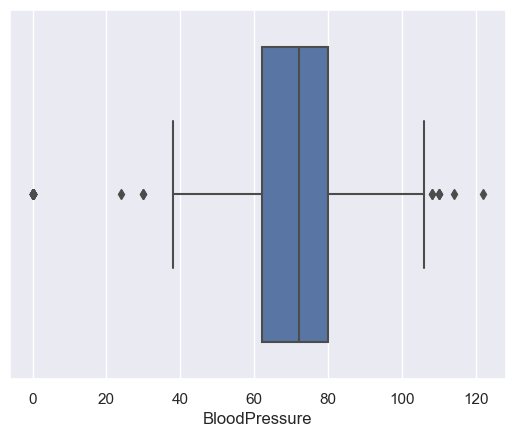

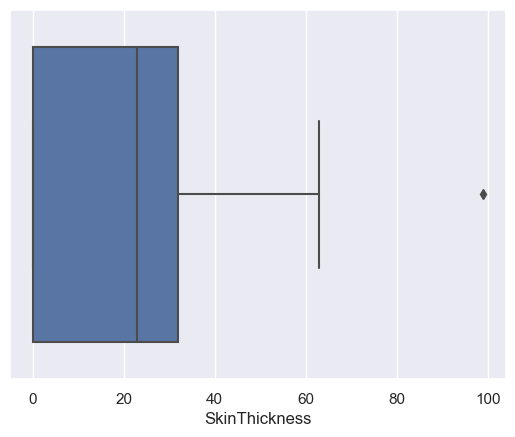

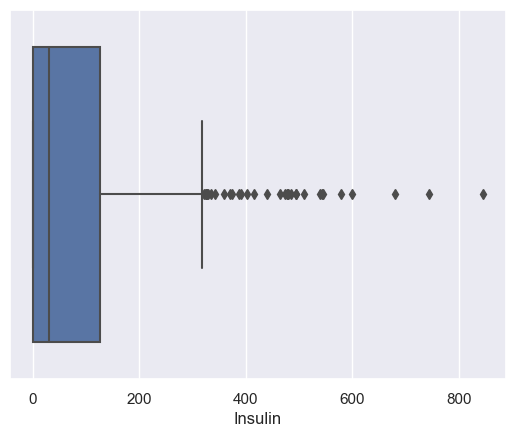

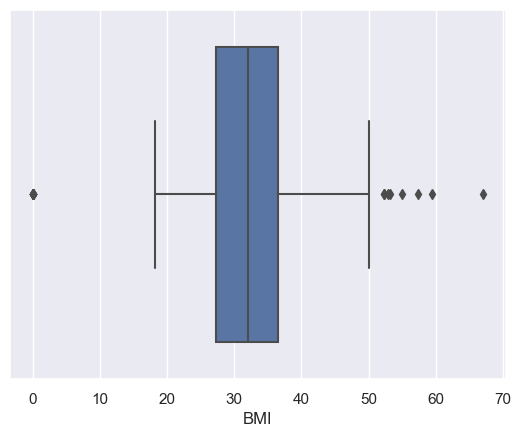

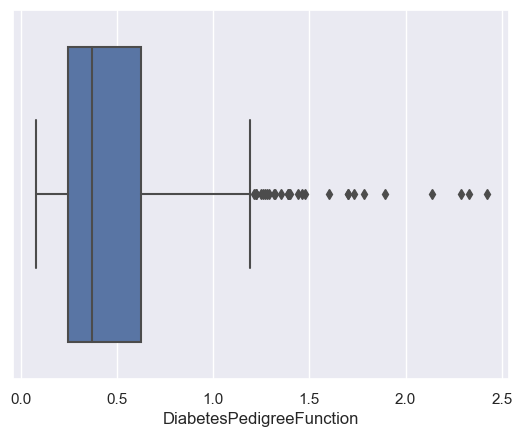

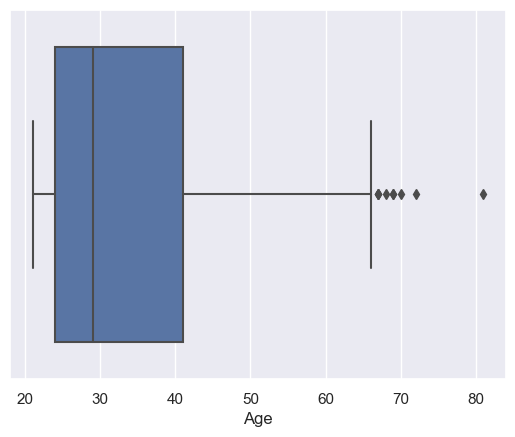

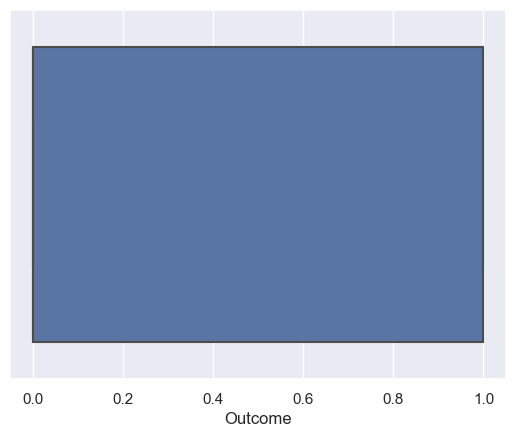

In [68]:
for c in df.columns:
    plt.figure()
    sns.boxplot(x = c, data = df, orient = "v")

### I have outlier values in the Insulin column and DiabetesPedigreeFunction column so much. I am going to clean the columns of the dataset.

In [69]:
# function to clear outlier data in the dataset.

def cleanColumn(data,columns, thr = 2):
    descirbe = data.describe()
    column_desc = descirbe[columns]
    
    q3 = column_desc[6]
    q1 = column_desc[4]
    IQR = q3 - q1
    
    top_limit_clm = q3 + thr * IQR
    bottom_limit_clm = q1 - thr * IQR
    
    filter_clm_bottom = bottom_limit_clm < data[columns]
    filter_clm_top = data[columns] < top_limit_clm
    
    filters = filter_clm_bottom & filter_clm_top
    
    data = data[filters]
    
    print("{} of dataset after column {}".format(data.shape, columns))
    
    return data

In [70]:
# I apply the function to the dataset.

for i in df.columns:
    df = cleanColumn(df,i)

(767, 9) of dataset after column Pregnancies
(762, 9) of dataset after column Glucose
(725, 9) of dataset after column BloodPressure
(724, 9) of dataset after column SkinThickness
(703, 9) of dataset after column Insulin
(695, 9) of dataset after column BMI
(682, 9) of dataset after column DiabetesPedigreeFunction
(681, 9) of dataset after column Age
(681, 9) of dataset after column Outcome


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               681 non-null    int64  
 1   Glucose                   681 non-null    int64  
 2   BloodPressure             681 non-null    int64  
 3   SkinThickness             681 non-null    int64  
 4   Insulin                   681 non-null    int64  
 5   BMI                       681 non-null    float64
 6   DiabetesPedigreeFunction  681 non-null    float64
 7   Age                       681 non-null    int64  
 8   Outcome                   681 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.2 KB


### Show Correlation of dataset

In [72]:
# Calculate the correlation matrix for the DataFrame
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.157294,0.226721,-0.086832,-0.084028,0.051650,0.004202,0.558368,0.248539
Glucose,0.157294,1.000000,0.242817,0.008818,0.271295,0.194971,0.076590,0.271577,0.483668
BloodPressure,0.226721,0.242817,1.000000,0.025055,-0.052317,0.307735,0.038300,0.360731,0.202467
SkinThickness,-0.086832,0.008818,0.025055,1.000000,0.470135,0.380055,0.154634,-0.153505,0.047858
Insulin,-0.084028,0.271295,-0.052317,0.470135,1.000000,0.177017,0.194309,-0.085251,0.108210
BMI,0.051650,0.194971,0.307735,0.380055,0.177017,1.000000,0.118537,0.058300,0.293003
DiabetesPedigreeFunction,0.004202,0.076590,0.038300,0.154634,0.194309,0.118537,1.000000,0.034366,0.206067
Age,0.558368,0.271577,0.360731,-0.153505,-0.085251,0.058300,0.034366,1.000000,0.255203
Outcome,0.248539,0.483668,0.202467,0.047858,0.108210,0.293003,0.206067,0.255203,1.000000


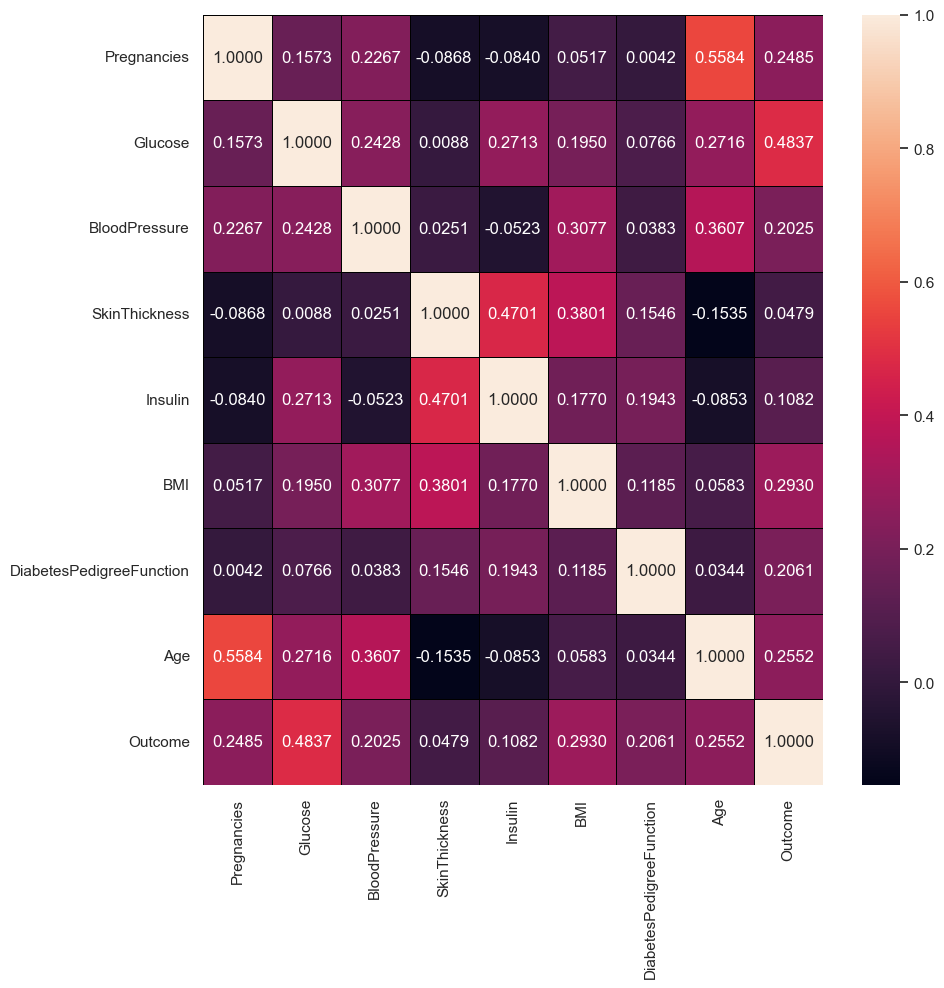

In [73]:
# Create a heatmap to visualize the correlation matrix of the DataFrame
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

<Axes: xlabel='Pregnancies', ylabel='count'>

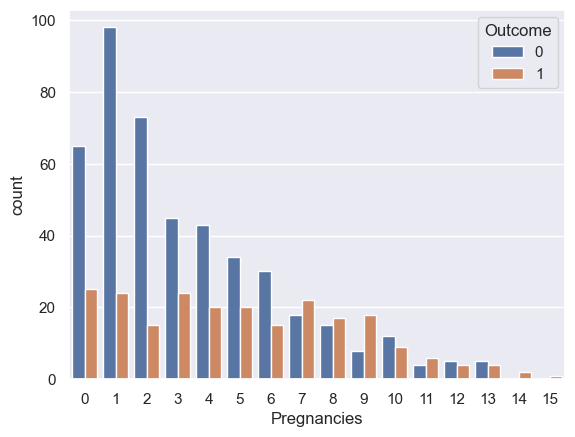

In [74]:
# Create a count plot to visualize the distribution of 'Pregnancies' with respect to 'Outcome'
sns.countplot(df,x='Pregnancies',hue='Outcome')

In [75]:
# ( row, columns ) in dataset
df.shape

(681, 9)

## 4- Model Development

In [76]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [77]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 681, dtype: int64

In [78]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [79]:
#!pip install -U imbalanced-learn

In [80]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)

In [81]:
# Importing train_test_split function from sklearn.model_selection to split data into training and testing sets
# X_train: training features, X_test: testing features, y_train: training target variable, y_test: testing target variable
# Splitting the data with a test size of 20% (0.2), where 80% of the data will be used for training and 20% for testing
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4) 

In [82]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
108,3,83,58,31,18,34.3,0.336,25
515,3,163,70,18,105,31.6,0.268,28
326,1,122,64,32,156,35.1,0.692,30
309,2,124,68,28,205,32.9,0.875,30
160,4,151,90,38,0,29.7,0.294,36
...,...,...,...,...,...,...,...,...
679,2,101,58,17,265,24.2,0.614,23
410,6,102,90,39,0,35.7,0.674,28
500,2,117,90,19,71,25.2,0.313,21
201,1,138,82,0,0,40.1,0.236,28


In [83]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
656,2,101,58,35,90,21.8,0.155,22
491,2,89,90,30,0,33.5,0.292,42
598,1,173,74,0,0,36.8,0.088,38
312,2,155,74,17,96,26.6,0.433,27
320,4,129,60,12,231,27.5,0.527,31
...,...,...,...,...,...,...,...,...
304,3,150,76,0,0,21.0,0.207,37
457,5,86,68,28,71,30.2,0.364,24
362,5,103,108,37,0,39.2,0.305,65
138,0,129,80,0,0,31.2,0.703,29


In [84]:




y_train

108    0
515    1
326    1
309    1
160    0
      ..
679    0
410    0
500    0
201    0
140    0
Name: Outcome, Length: 544, dtype: int64

In [85]:
y_test

656    0
491    0
598    1
312    1
320    0
      ..
304    0
457    0
362    0
138    0
660    0
Name: Outcome, Length: 137, dtype: int64

In [86]:
# Import classifiers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
# Import Gaussian NB Classification models
from sklearn.naive_bayes import GaussianNB
# Import Logistic Regression Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score


from sklearn.ensemble import VotingClassifier

In [87]:
# Initialize classifiers
bagging_clf = BaggingClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
perceptron_clf = Perceptron(random_state=42)
svc_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier()
logistic_clf=LogisticRegression()
GaussianNB_clf=GaussianNB()
ExtraTrees_clf=ExtraTreesClassifier()
GradientBoostingClassifier_clf=GradientBoostingClassifier()
LinearDiscriminantAnalysis_clf=LinearDiscriminantAnalysis()
AdaBoostClassifier_clf=AdaBoostClassifier()

In [88]:
# List of classifiers
classifiers = [
    ('Bagging', bagging_clf),
    ('Random Forest', rf_clf),
    ('Decision Tree', dt_clf),
    ('Perceptron', perceptron_clf),
    ('SVC', svc_clf),
    ('KNN', knn_clf),
    ('logistic Regression',logistic_clf),
    ('Gaussian NB',GaussianNB_clf),
    ('ExtraTreesClassifier',ExtraTrees_clf),
    ('GradientBoostingClassifier',GradientBoostingClassifier_clf),
    ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis_clf),
    ('AdaBoostClassifier',AdaBoostClassifier_clf)
]

In [89]:
dicDataFrame={
    'Classifier Name':[],
    'Accuracy':[],
    'precision':[],
    'recall':[],
    'F1_score':[],
}
Maxaccuracy=0
Maxprecision=0
Maxrecall=0
Maxf1=0
ListMax_accuracy=[]
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    # Calculate precision
    precision = precision_score(y_test, y_pred)*100

    # Calculate recall
    recall = recall_score(y_test, y_pred)*100

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)*100
    
    dicDataFrame['Classifier Name'].append(clf_name)
    dicDataFrame['Accuracy'].append(accuracy)
    dicDataFrame['precision'].append(precision)
    dicDataFrame['recall'].append(recall)
    dicDataFrame['F1_score'].append(f1)

    if accuracy > Maxaccuracy :
        Maxaccuracy=accuracy
        ListMax_accuracy=[(clf_name,clf)]
    if precision > Maxprecision :
        Maxprecision=precision
    if recall > Maxrecall :
        Maxrecall=recall
    if f1 > Maxf1 :
        Maxf1=f1
        
DataFrame=pd.DataFrame(dicDataFrame)
DataFrame.loc[-1]=[ListMax_accuracy[0],Maxaccuracy,Maxprecision,Maxrecall,Maxf1]
#display(DataFrame)
#print(f"Max accuracy :{Maxaccuracy} , classifier of max accuracy : {ListMax_accuracy}")

In [90]:
DataFrame.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7,8,9,10,11,'Max Accuracy'], axis=0)

,CLASSIFIER NAME,ACCURACY,PRECISION,RECALL,F1_SCORE
0,Bagging,"72,993","41,860","60,000","49,315"
1,Random Forest,"83,212","60,000","70,000","64,615"
2,Decision Tree,"69,343","37,500","60,000","46,154"
3,Perceptron,"70,803","35,294","40,000","37,500"
4,SVC,"81,022","58,333","46,667","51,852"
5,KNN,"75,912","46,341","63,333","53,521"
6,logistic Regression,"78,102","50,000","56,667","53,125"
7,Gaussian NB,"81,022","54,762","76,667","63,889"
8,ExtraTreesClassifier,"81,752","57,576","63,333","60,317"
9,GradientBoostingClassifier,"76,642","47,500","63,333","54,286"


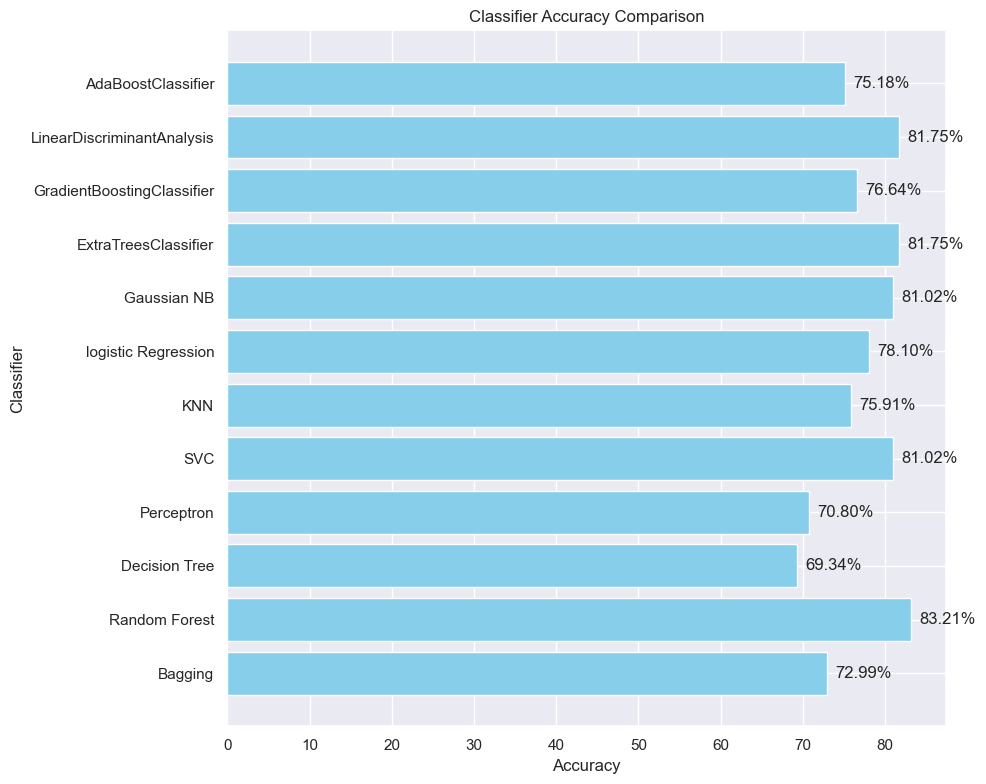

In [91]:
plt.figure(figsize=(10, 8))
bars = plt.barh(DataFrame['Classifier Name'][:-1], DataFrame['Accuracy'][0:-1], color='skyblue')
# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Classifier Accuracy Comparison')

# Add accuracy values to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

# Show the plot
plt.tight_layout()
plt.show()

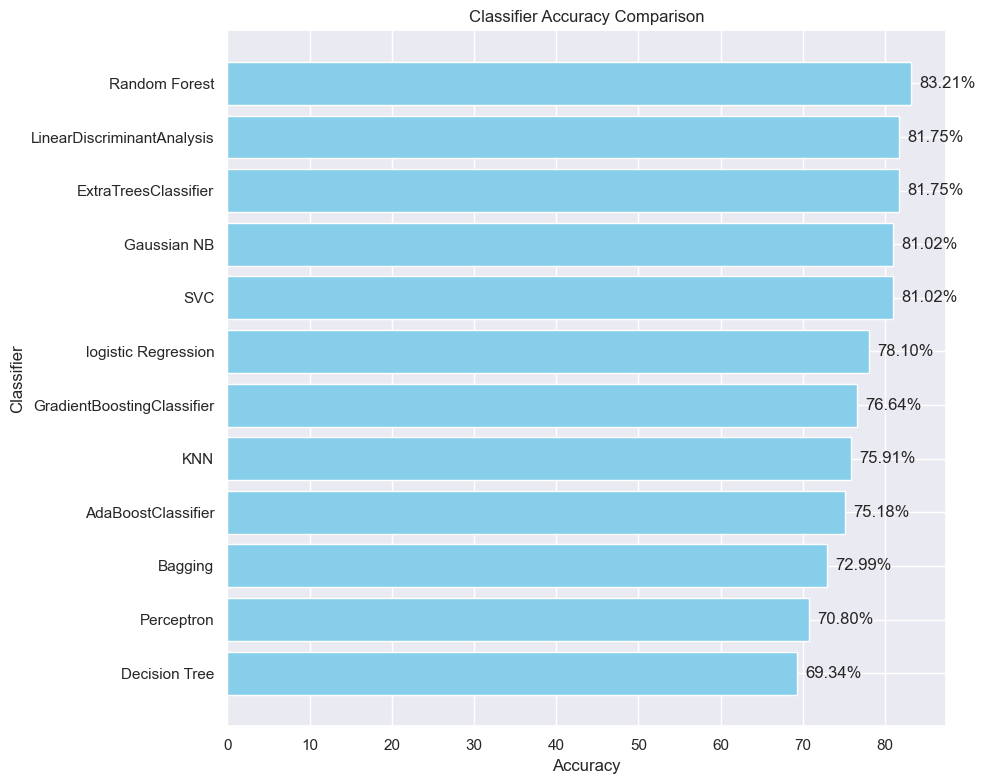

In [92]:
# Sort DataFrame by 'Accuracy' column in ascending order
DataFrame_sorted = DataFrame[:-1].sort_values(by='Accuracy', ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(DataFrame_sorted['Classifier Name'], DataFrame_sorted['Accuracy'], color='skyblue')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Classifier Accuracy Comparison')

# Add accuracy values to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [93]:
dicDataFrame_round2_1={
    'Classifier Name':[],
    'Accuracy':[]
}
Maxaccuracy_round2_1=Maxaccuracy
ListMax_accuracy_round2_1=ListMax_accuracy
for i in classifiers:
    if ListMax_accuracy[0] != i:
        list1=[i,ListMax_accuracy[0]]
        NameClassifier=i[0]+' and '+ListMax_accuracy[0][0]
        ensemble_classifier = VotingClassifier(estimators=list1)
        ensemble_classifier.fit(X_train, y_train)
        y_pred = ensemble_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)*100
        dicDataFrame_round2_1['Classifier Name'].append(NameClassifier)
        dicDataFrame_round2_1['Accuracy'].append(accuracy)
        if accuracy> Maxaccuracy_round2_1:
            Maxaccuracy_round2_1=accuracy
            ListMax_accuracy_round2_1=list1
DataFrame_round2_1=pd.DataFrame(dicDataFrame_round2_1)
DataFrame_round2_1.loc[-1]=[ ListMax_accuracy_round2_1,Maxaccuracy_round2_1]
#display(DataFrame_round2_1)

In [94]:
DataFrame_round2_1.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7,8,9,10,'Max Accuracy'], axis=0)

,CLASSIFIER NAME,ACCURACY
0,Bagging and Random Forest,"80,292"
1,Decision Tree and Random Forest,"83,212"
2,Perceptron and Random Forest,"81,752"
3,SVC and Random Forest,"82,482"
4,KNN and Random Forest,"82,482"
5,logistic Regression and Random Forest,"83,212"
6,Gaussian NB and Random Forest,"85,401"
7,ExtraTreesClassifier and Random Forest,"81,752"
8,GradientBoostingClassifier and Random Forest,"82,482"
9,LinearDiscriminantAnalysis and Random Forest,"86,131"


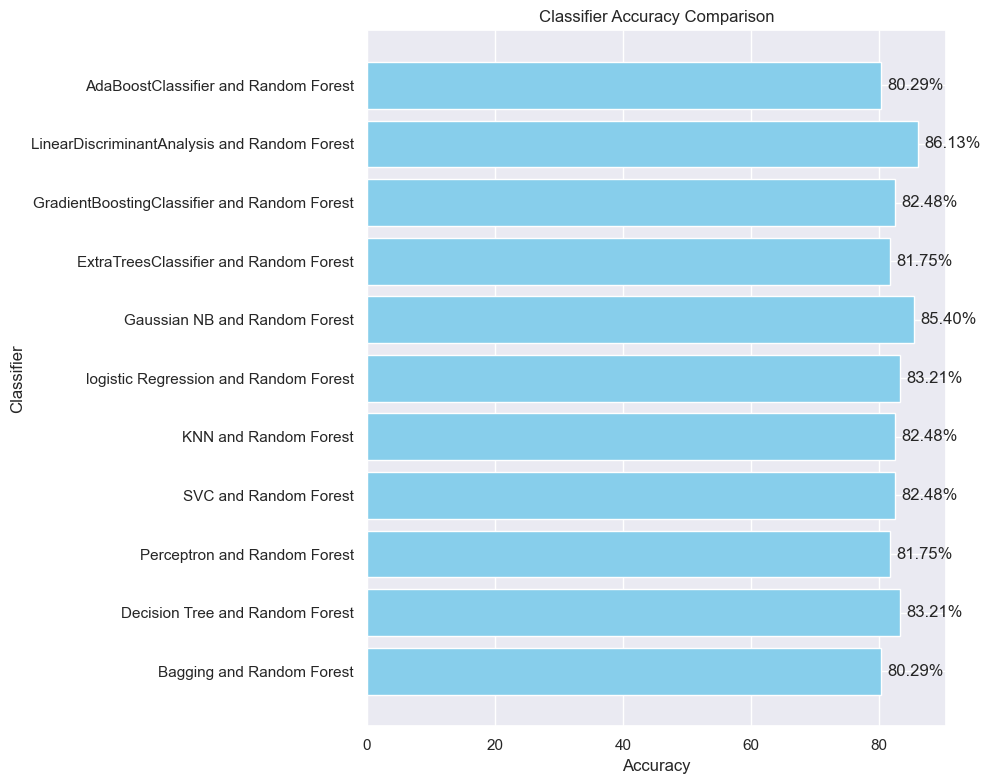

In [95]:
plt.figure(figsize=(10, 8))
bars = plt.barh(DataFrame_round2_1['Classifier Name'][:-1], DataFrame_round2_1['Accuracy'][0:-1], color='skyblue')
# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Classifier Accuracy Comparison')

# Add accuracy values to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

# Show the plot
plt.tight_layout()
plt.show()

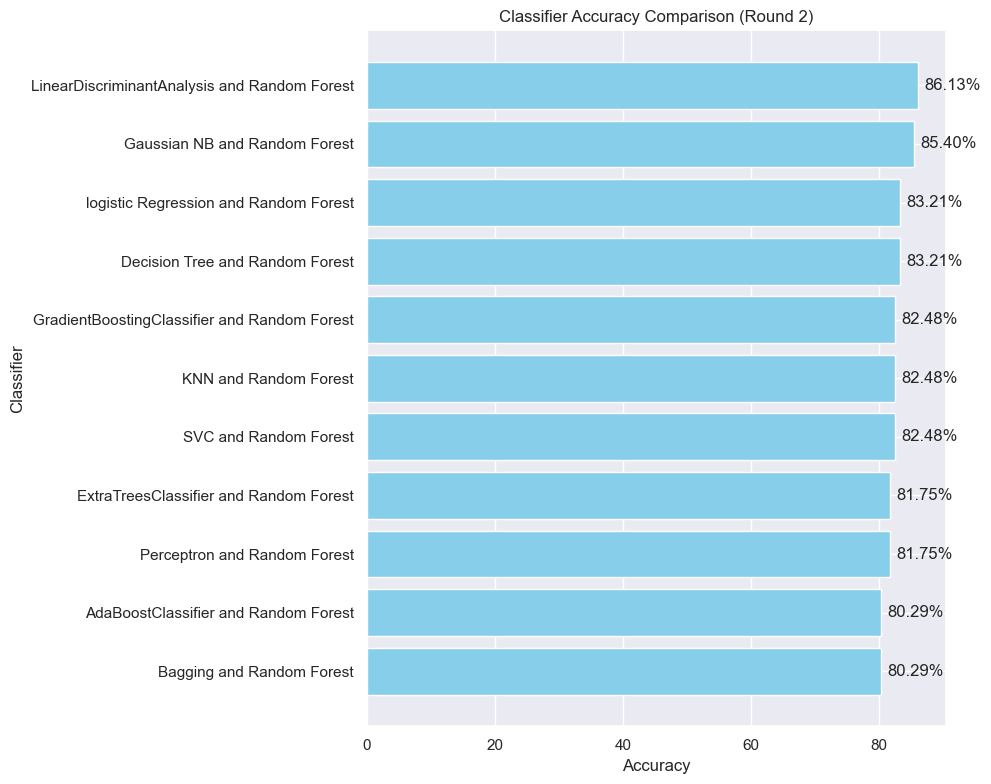

In [104]:
DataFrame_round2_1_sorted = DataFrame_round2_1[:-1].sort_values(by='Accuracy', ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(DataFrame_round2_1_sorted['Classifier Name'], DataFrame_round2_1_sorted['Accuracy'], color='skyblue')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Classifier Accuracy Comparison (Round 2)')

# Add accuracy values to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [96]:
dicDataFrame_round2_2={
    'Classifier Name':[],
    'Accuracy':[]
}
Maxaccuracy_round2_2=Maxaccuracy
ListMax_accuracy_round2_2=ListMax_accuracy
for num in range(0,12):
    for i in range(num+1,12):
        list1=[classifiers[i],classifiers[num]]
        NameClassifier=classifiers[i][0]+' and '+classifiers[num][0]
        ensemble_classifier = VotingClassifier(estimators=list1)
        ensemble_classifier.fit(X_train, y_train)
        y_pred = ensemble_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)*100
        dicDataFrame_round2_2['Classifier Name'].append(NameClassifier)
        dicDataFrame_round2_2['Accuracy'].append(accuracy)
        if accuracy> Maxaccuracy_round2_2:
            Maxaccuracy_round2_2=accuracy
            ListMax_accuracy_round2_2=list1
DataFrame_round2_2=pd.DataFrame(dicDataFrame_round2_2)
print(DataFrame_round2_2['Classifier Name'].nunique())
DataFrame_round2_2.loc[-1]=[ ListMax_accuracy_round2_2,Maxaccuracy_round2_2]
#display(DataFrame_round2_2)

66


In [97]:

List67=list(range(0,66))
List67.append('Max Accuracy')
DataFrame_round2_2.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(List67, axis=0)

,CLASSIFIER NAME,ACCURACY
0,Random Forest and Bagging,"80,292"
1,Decision Tree and Bagging,"75,182"
2,Perceptron and Bagging,"81,022"
3,SVC and Bagging,"79,562"
4,KNN and Bagging,"77,372"
5,logistic Regression and Bagging,"79,562"
6,Gaussian NB and Bagging,"80,292"
7,ExtraTreesClassifier and Bagging,"79,562"
8,GradientBoostingClassifier and Bagging,"78,102"
9,LinearDiscriminantAnalysis and Bagging,"81,752"


In [98]:
dicDataFrame_round3_1={
    'Classifier Name':[],
    'Accuracy':[]
}
Maxaccuracy_round3_1=Maxaccuracy_round2_1
ListMax_accuracy_round3_1=ListMax_accuracy_round2_1
for i in classifiers:
    if len(ListMax_accuracy_round2_1)==2:
        if i not in ListMax_accuracy_round2_1:
            list2=[i,ListMax_accuracy_round2_1[0],ListMax_accuracy_round2_1[1]]
            NameClassifier=i[0]+' and '+ListMax_accuracy_round2_1[0][0]+' and '+ListMax_accuracy_round2_1[1][0]
            ensemble_classifier = VotingClassifier(estimators=list2)
            ensemble_classifier.fit(X_train, y_train)
            y_pred = ensemble_classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)*100
            dicDataFrame_round3_1['Classifier Name'].append(NameClassifier)
            dicDataFrame_round3_1['Accuracy'].append(accuracy)
            if accuracy> Maxaccuracy_round3_1:
                Maxaccuracy_round3_1=accuracy
                ListMax_accuracy_round3_1=list2
DataFrame_round3_1=pd.DataFrame(dicDataFrame_round3_1)
DataFrame_round3_1.loc[-1]=[ ListMax_accuracy_round3_1,Maxaccuracy_round3_1]
#display(DataFrame_round3_1)

In [99]:
DataFrame_round3_1.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7,8,9,'Max Accuracy'], axis=0)

,CLASSIFIER NAME,ACCURACY
0,Bagging and LinearDiscriminantAnalysis and Random Forest,"81,752"
1,Decision Tree and LinearDiscriminantAnalysis and Random Forest,"83,212"
2,Perceptron and LinearDiscriminantAnalysis and Random Forest,"84,672"
3,SVC and LinearDiscriminantAnalysis and Random Forest,"84,672"
4,KNN and LinearDiscriminantAnalysis and Random Forest,"82,482"
5,logistic Regression and LinearDiscriminantAnalysis and Random Forest,"82,482"
6,Gaussian NB and LinearDiscriminantAnalysis and Random Forest,"82,482"
7,ExtraTreesClassifier and LinearDiscriminantAnalysis and Random Forest,"84,672"
8,GradientBoostingClassifier and LinearDiscriminantAnalysis and Random Forest,"80,292"
9,AdaBoostClassifier and LinearDiscriminantAnalysis and Random Forest,"79,562"


In [100]:
dicDataFrame_round3_2={
    'Classifier Name':[],
    'Accuracy':[]
}
 
Maxaccuracy_round3_2=Maxaccuracy_round2_2
ListMax_accuracy_round3_2=ListMax_accuracy_round2_2

for i in range(0,12):
    for j in range(i+1,12):
        for x in range(j+1,12):
            if classifiers[i] not in [classifiers[j],classifiers[x]] and classifiers[j]!=classifiers[x] :
                list2=[classifiers[i],classifiers[j],classifiers[x]]
                NameClassifier=classifiers[i][0]+' and '+classifiers[j][0]+' and '+classifiers[x][0]
                ensemble_classifier = VotingClassifier(estimators=list2)
                ensemble_classifier.fit(X_train, y_train)
                y_pred = ensemble_classifier.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)*100
                dicDataFrame_round3_2['Classifier Name'].append(NameClassifier)
                dicDataFrame_round3_2['Accuracy'].append(accuracy)
                if accuracy> Maxaccuracy_round3_2:
                    Maxaccuracy_round3_2=accuracy
                    ListMax_accuracy_round3_2=list2
DataFrame_round3_2=pd.DataFrame(dicDataFrame_round3_2)
print(DataFrame_round3_2['Classifier Name'].nunique())
DataFrame_round3_2.loc[-1]=[ ListMax_accuracy_round3_2,Maxaccuracy_round3_2]
#display(DataFrame_round3_2)

220


In [101]:
List221=list(range(0,220))
List221.append('Max Accuracy')
DataFrame_round3_2.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(List221, axis=0)

,CLASSIFIER NAME,ACCURACY
0,Bagging and Random Forest and Decision Tree,"78,102"
1,Bagging and Random Forest and Perceptron,"79,562"
2,Bagging and Random Forest and SVC,"83,212"
3,Bagging and Random Forest and KNN,"81,022"
4,Bagging and Random Forest and logistic Regression,"81,022"
5,Bagging and Random Forest and Gaussian NB,"81,022"
6,Bagging and Random Forest and ExtraTreesClassifier,"81,022"
7,Bagging and Random Forest and GradientBoostingClassifier,"81,752"
8,Bagging and Random Forest and LinearDiscriminantAnalysis,"81,752"
9,Bagging and Random Forest and AdaBoostClassifier,"80,292"


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Create pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())  # You can add more preprocessing steps here
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())  # You can customize this for your categorical features
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']),
       
    ])


In [103]:
dicDataFrame={
    'Classifier Name':[],
    'Accuracy':[]
}
Maxaccuracy=20
ListMax_accuracy=[]
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', clf)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    dicDataFrame['Classifier Name'].append(clf_name)
    dicDataFrame['Accuracy'].append(accuracy)
    if accuracy > Maxaccuracy :
        Maxaccuracy=accuracy
        ListMax_accuracy=[(clf_name,clf)]
DataFrame=pd.DataFrame(dicDataFrame)
DataFrame.loc[-1]=[ListMax_accuracy[0],Maxaccuracy]

In [50]:
DataFrame.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7,8,9,10,11,'Max Accuracy'], axis=0)

,CLASSIFIER NAME,ACCURACY
0,Bagging,"72,993"
1,Random Forest,"84,672"
2,Decision Tree,"69,343"
3,Perceptron,"62,044"
4,SVC,"80,292"
5,KNN,"81,022"
6,logistic Regression,"79,562"
7,Gaussian NB,"81,022"
8,ExtraTreesClassifier,"81,752"
9,GradientBoostingClassifier,"78,102"


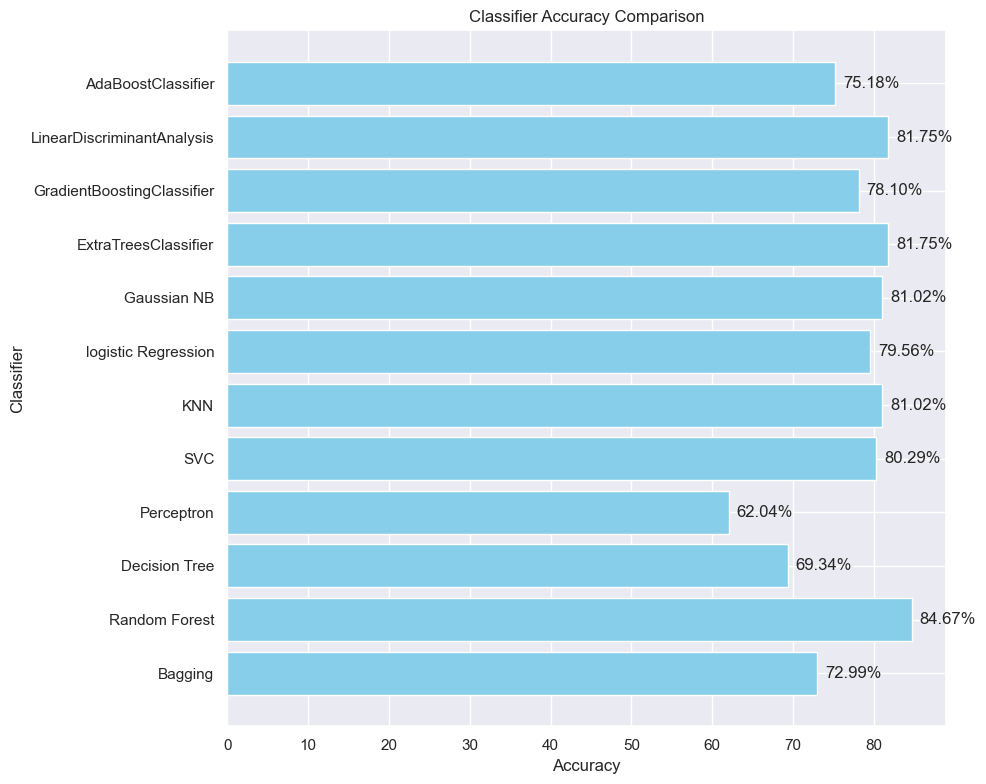

In [51]:
plt.figure(figsize=(10, 8))
bars = plt.barh(DataFrame['Classifier Name'][:-1], DataFrame['Accuracy'][0:-1], color='skyblue')
# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Classifier Accuracy Comparison')

# Add accuracy values to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

# Show the plot
plt.tight_layout()
plt.show()